##### Predicting the Success of Google Play Store Applications

##### The success of applications is estimated based on several criteria, including payment, number of downloads, age group, classification, app size, price, and number of reviews.

##### Data was obtained from Kaggle. (https://www.kaggle.com/datasets/lava18/google-play-store-apps)

##### Various models were used for prediction, including regression models such as Linear Regressor and Random Forest Regressor, as well as classification algorithms like Logistic Regression, KNN, and Random Forest.

##### Regression models were evaluated based on factors such as RMSE, MAE, and RMSE, revealing their inefficiency and unsuitability.

##### Subsequently, classification models were assessed by calculating the accuracy for each model and comparing it with the test dataset. The AUV (Area Under Curve) was also computed for each model, with some models demonstrating high AUV values, indicating their suitability and success in prediction.

##### This report encompasses the entire process, from data acquisition to preprocessing, data segmentation into subgroups, modeling, testing, and final decision-making.

# Importing Libraries

In [2180]:
#Libraries for data manipulation
import pandas as pd 
import numpy as np 
from collections import defaultdict

#visualization
import matplotlib.pyplot as pltf 
import seaborn as sns 
import missingno as msn
from wordcloud import WordCloud

# Preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

# Regression
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor

#classification algorithms
from sklearn.linear_model import LogisticRegression 
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier 
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
# Metrics
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

#classification algorithms testing
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve, auc
from sklearn.multiclass import OneVsRestClassifier

#library for create the final report
from sklearn.metrics import classification_report


pltf.style.use('fivethirtyeight')

# Hide warnings
import warnings
warnings.filterwarnings('ignore')

# 1- Geting Data

In [2181]:
data = pd.read_csv(r'C:\Users\96650\Desktop\Project\data\googleplaystore.csv')

# Explore Data

In [2182]:
data.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [2183]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [2184]:
data.describe()

,Rating
count,9367.000000
mean,4.193338
std,0.537431
min,1.000000
25%,4.000000
50%,4.300000
75%,4.500000
max,19.000000


In [2185]:
data.shape

(10841, 13)

# 2- Preprocessing

 #### Before the data mining process, it is necessary to clean the data, organize it, and prepare it in the appropriate format.
 #### A- Handle Null Values
 #### B- Drop Duplicates
 #### C- Modify Columns, Datatype, Data
 #### D- Exploer The Data After Preprocessing 

### A- Cheak Null Values

In [2186]:
data.isnull().any()

App               False
Category          False
Rating             True
Reviews           False
Size              False
Installs          False
Type               True
Price             False
Content Rating     True
Genres            False
Last Updated      False
Current Ver        True
Android Ver        True
dtype: bool

In [2187]:
null = pd.DataFrame({'Null Values' : data.isna().sum().sort_values(ascending=False), 'Percentage Null Values' : (data.isna().sum().sort_values(ascending=False)) / (data.shape[0]) * (100)})
null

,Null Values,Percentage Null Values
Rating,1474,13.596532
Current Ver,8,0.073794
Android Ver,3,0.027673
Type,1,0.009224
Content Rating,1,0.009224
App,0,0.000000
Category,0,0.000000
Reviews,0,0.000000
Size,0,0.000000
Installs,0,0.000000


<BarContainer object of 13 artists>

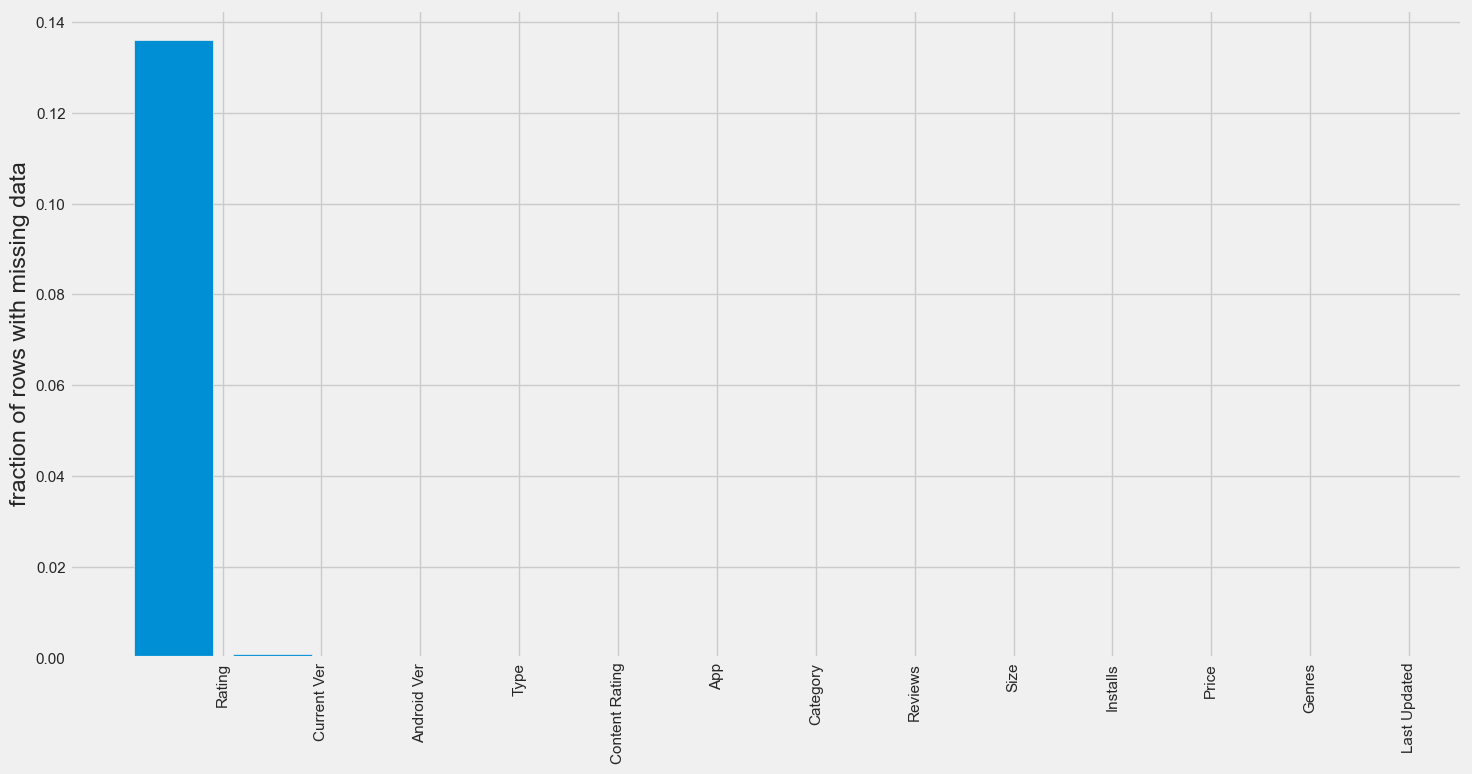

In [2188]:
null_counts = data.isna().sum().sort_values(ascending=False)/len(data)
pltf.figure(figsize=(16,8))
pltf.xticks(np.arange(len(null_counts))+0.5,null_counts.index,rotation='vertical')
pltf.ylabel('fraction of rows with missing data')
pltf.bar(np.arange(len(null_counts)),null_counts)

#### We have null values in the "Rating,", "Current Ver", "Android Ver", "Content Rating," and "Last Update". so we need to handle them

In [2189]:
data[data['Rating'].isna() == 1] 

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
23,Mcqueen Coloring pages,ART_AND_DESIGN,NaN,61,7.0M,"100,000+",Free,0,Everyone,Art & Design;Action & Adventure,"March 7, 2018",1.0.0,4.1 and up
113,Wrinkles and rejuvenation,BEAUTY,NaN,182,5.7M,"100,000+",Free,0,Everyone 10+,Beauty,"September 20, 2017",8.0,3.0 and up
123,Manicure - nail design,BEAUTY,NaN,119,3.7M,"50,000+",Free,0,Everyone,Beauty,"July 23, 2018",1.3,4.1 and up
126,Skin Care and Natural Beauty,BEAUTY,NaN,654,7.4M,"100,000+",Free,0,Teen,Beauty,"July 17, 2018",1.15,4.1 and up
129,"Secrets of beauty, youth and health",BEAUTY,NaN,77,2.9M,"10,000+",Free,0,Mature 17+,Beauty,"August 8, 2017",2.0,2.3 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10824,Cardio-FR,MEDICAL,NaN,67,82M,"10,000+",Free,0,Everyone,Medical,"July 31, 2018",2.2.2,4.4 and up
10825,Naruto & Boruto FR,SOCIAL,NaN,7,7.7M,100+,Free,0,Teen,Social,"February 2, 2018",1.0,4.0 and up
10831,payermonstationnement.fr,MAPS_AND_NAVIGATION,NaN,38,9.8M,"5,000+",Free,0,Everyone,Maps & Navigation,"June 13, 2018",2.0.148.0,4.0 and up
10835,FR Forms,BUSINESS,NaN,0,9.6M,10+,Free,0,Everyone,Business,"September 29, 2016",1.1.5,4.0 and up


#### Cleaning missing values using Random Value using the Median -- Best Way --

In [2190]:
def impute_median(series):
    return series.fillna(series.median())

data['Rating'] = data['Rating'].transform(impute_median)

#### We will replace the Null or NaN Content Rating with an empty text value because it will have no impact.

In [2191]:
data[data['Content Rating'].isna() == 1]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,"1,000+",Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


In [2192]:
data['Content Rating'] = data['Content Rating'].fillna('')

In [2193]:
data[data['Current Ver'].isna() == 1]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
15,Learn To Draw Kawaii Characters,ART_AND_DESIGN,3.2,55,2.7M,"5,000+",Free,0,Everyone,Art & Design,"June 6, 2018",NaN,4.2 and up
1553,Market Update Helper,LIBRARIES_AND_DEMO,4.1,20145,11k,"1,000,000+",Free,0,Everyone,Libraries & Demo,"February 12, 2013",NaN,1.5 and up
6322,Virtual DJ Sound Mixer,TOOLS,4.2,4010,8.7M,"500,000+",Free,0,Everyone,Tools,"May 10, 2017",NaN,4.0 and up
6803,BT Master,FAMILY,4.3,0,222k,100+,Free,0,Everyone,Education,"November 6, 2016",NaN,1.6 and up
7333,Dots puzzle,FAMILY,4.0,179,14M,"50,000+",Paid,$0.99,Everyone,Puzzle,"April 18, 2018",NaN,4.0 and up
7407,Calculate My IQ,FAMILY,4.3,44,7.2M,"10,000+",Free,0,Everyone,Entertainment,"April 3, 2017",NaN,2.3 and up
7730,UFO-CQ,TOOLS,4.3,1,237k,10+,Paid,$0.99,Everyone,Tools,"July 4, 2016",NaN,2.0 and up
10342,La Fe de Jesus,BOOKS_AND_REFERENCE,4.3,8,658k,"1,000+",Free,0,Everyone,Books & Reference,"January 31, 2017",NaN,3.0 and up


In [2194]:
data = data.dropna(axis=0)

#### Now our data doesn't conatin any Null value

In [2195]:
data.isnull().any()

App               False
Category          False
Rating            False
Reviews           False
Size              False
Installs          False
Type              False
Price             False
Content Rating    False
Genres            False
Last Updated      False
Current Ver       False
Android Ver       False
dtype: bool

### B- Dropping Duplicate

In [2196]:
data.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
10836    False
10837    False
10838    False
10839    False
10840    False
Length: 10829, dtype: bool

#### There is not any duplicated values

In [2197]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10829 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10829 non-null  object 
 1   Category        10829 non-null  object 
 2   Rating          10829 non-null  float64
 3   Reviews         10829 non-null  object 
 4   Size            10829 non-null  object 
 5   Installs        10829 non-null  object 
 6   Type            10829 non-null  object 
 7   Price           10829 non-null  object 
 8   Content Rating  10829 non-null  object 
 9   Genres          10829 non-null  object 
 10  Last Updated    10829 non-null  object 
 11  Current Ver     10829 non-null  object 
 12  Android Ver     10829 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.2+ MB


### C- Modify Columns, Datatype, Data

#### Making the "installs" column a numeric value and remove the "+"

In [2198]:
data = data[~data['Installs'].str.contains('Free')]
data['Installs'] = data['Installs'].str.replace('+', '').str.replace(',', '').astype(float)

In [2199]:
data.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,10000.0,Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,500000.0,Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,5000000.0,Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,50000000.0,Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,100000.0,Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [2200]:
data.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,10000.0,Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,500000.0,Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,5000000.0,Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,50000000.0,Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,100000.0,Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


#### Converting the values in the application size column to numeric values representing the size in megabytes.

In [2201]:
# Remove all characters
# convert it to float.
data['Size']=data['Size'].str.replace('M','000')
data['Size']=data['Size'].str.replace('k','')
#apps['size']=apps['size'].str.replace('.','')
data['Size']=data['Size'].replace("Varies with device",np.nan)
data['Size']=data['Size'].astype('float')
data['Size']

#  Convert mega to kilo then convert all to mega
for i in data['Size']:
    if i < 10:
        data['Size']=data['Size'].replace(i,i*1000)
data['Size']=data['Size']/1000
data['Size']

data = data.rename(columns={"Size": "Size(megabytes)"}) ## Change The Columns Name 
data.head()

,App,Category,Rating,Reviews,Size(megabytes),Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19.0,10000.0,Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,500000.0,Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7,5000000.0,Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25.0,50000000.0,Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8,100000.0,Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [2202]:
#Column after Replacing "Varies with device" with the Median in a Single Line
def impute_median(series):
    return series.fillna(series.median())

data['Size(megabytes)'] = data['Size(megabytes)'].transform(impute_median)

#### Converting the "last updated" column to the date type from the Pandas library, and split it into two column

In [2203]:
data['Last Updated'] = pd.to_datetime(data['Last Updated'])
data['Updated_Month']=data['Last Updated'].dt.month
data['Updated_Year']=data['Last Updated'].dt.year
data.drop('Last Updated', axis=1, inplace=True) # Delete Last Updated Column !
data.head()

,App,Category,Rating,Reviews,Size(megabytes),Installs,Type,Price,Content Rating,Genres,Current Ver,Android Ver,Updated_Month,Updated_Year
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19.0,10000.0,Free,0,Everyone,Art & Design,1.0.0,4.0.3 and up,1,2018
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,500000.0,Free,0,Everyone,Art & Design;Pretend Play,2.0.0,4.0.3 and up,1,2018
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7,5000000.0,Free,0,Everyone,Art & Design,1.2.4,4.0.3 and up,8,2018
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25.0,50000000.0,Free,0,Teen,Art & Design,Varies with device,4.2 and up,6,2018
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8,100000.0,Free,0,Everyone,Art & Design;Creativity,1.1,4.4 and up,6,2018


#### Converting Categorical Data in "Grenres" Column to Binary Representation: Understanding the Concept and Implementation of One-Hot Encoding

#### Converting "Reviews" and "Price" to Numeric Type

In [2204]:
data['Reviews'] = data['Reviews'].astype(int)

In [2205]:
unique_values = data['Price'].unique()

print(unique_values)

['0' '$4.99' '$3.99' '$6.99' '$1.49' '$2.99' '$7.99' '$5.99' '$3.49'
 '$1.99' '$9.99' '$7.49' '$0.99' '$9.00' '$5.49' '$10.00' '$24.99'
 '$11.99' '$79.99' '$16.99' '$14.99' '$1.00' '$29.99' '$12.99' '$2.49'
 '$10.99' '$1.50' '$19.99' '$15.99' '$33.99' '$74.99' '$39.99' '$3.95'
 '$4.49' '$1.70' '$8.99' '$2.00' '$3.88' '$25.99' '$399.99' '$17.99'
 '$400.00' '$3.02' '$1.76' '$4.84' '$4.77' '$1.61' '$2.50' '$1.59' '$6.49'
 '$1.29' '$5.00' '$13.99' '$299.99' '$379.99' '$37.99' '$18.99' '$389.99'
 '$19.90' '$8.49' '$1.75' '$14.00' '$4.85' '$46.99' '$109.99' '$154.99'
 '$3.08' '$2.59' '$4.80' '$1.96' '$19.40' '$3.90' '$4.59' '$15.46' '$3.04'
 '$4.29' '$2.60' '$3.28' '$4.60' '$28.99' '$2.95' '$2.90' '$1.97'
 '$200.00' '$89.99' '$2.56' '$30.99' '$3.61' '$394.99' '$1.26' '$1.20'
 '$1.04']


In [2206]:
# Remove the dollar sign ($) from the "Price" column
data['Price'] = data['Price'].str.replace('$', '')

# Convert the "Price($)" column to float
data['Price'] = data['Price'].astype(float)

data.rename(columns={'Price': 'Price($)'}, inplace=True)

data

,App,Category,Rating,Reviews,Size(megabytes),Installs,Type,Price($),Content Rating,Genres,Current Ver,Android Ver,Updated_Month,Updated_Year
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19.0,10000.0,Free,0.0,Everyone,Art & Design,1.0.0,4.0.3 and up,1,2018
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,500000.0,Free,0.0,Everyone,Art & Design;Pretend Play,2.0.0,4.0.3 and up,1,2018
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7,5000000.0,Free,0.0,Everyone,Art & Design,1.2.4,4.0.3 and up,8,2018
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25.0,50000000.0,Free,0.0,Teen,Art & Design,Varies with device,4.2 and up,6,2018
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8,100000.0,Free,0.0,Everyone,Art & Design;Creativity,1.1,4.4 and up,6,2018
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53.0,5000.0,Free,0.0,Everyone,Education,1.48,4.1 and up,7,2017
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6,100.0,Free,0.0,Everyone,Education,1.0,4.1 and up,7,2018
10838,Parkinson Exercices FR,MEDICAL,4.3,3,9.5,1000.0,Free,0.0,Everyone,Medical,1.0,2.2 and up,1,2017
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,13.0,1000.0,Free,0.0,Mature 17+,Books & Reference,Varies with device,Varies with device,1,2015


### D- Check outliers

<Axes: ylabel='Rating'>

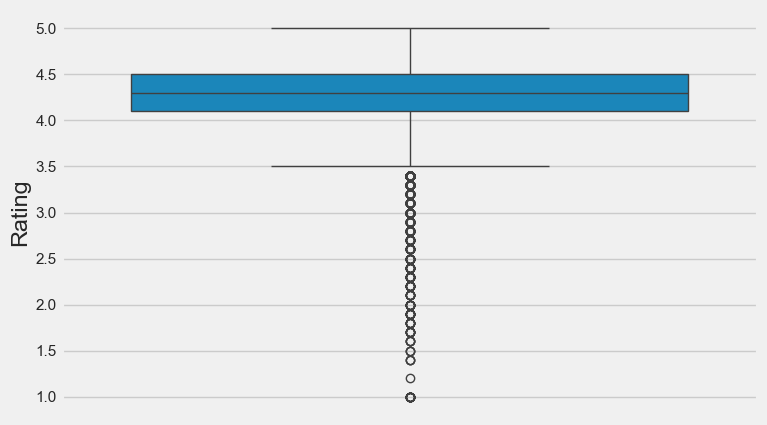

In [2207]:
sns.boxplot(data["Rating"])

<Axes: ylabel='Size(megabytes)'>

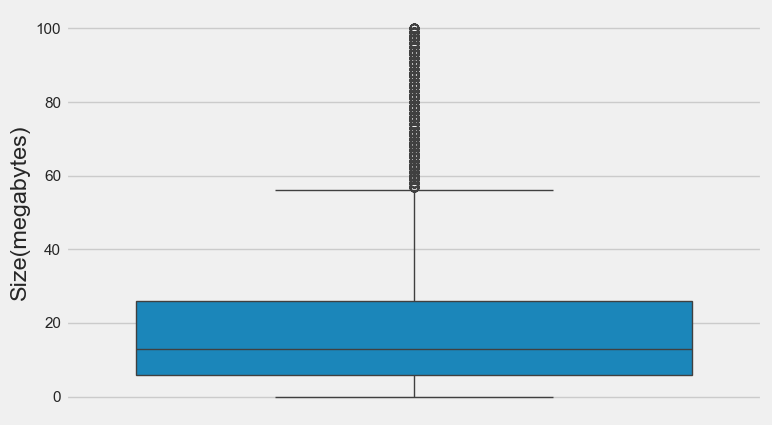

In [2208]:
sns.boxplot(data["Size(megabytes)"])

<Axes: ylabel='Installs'>

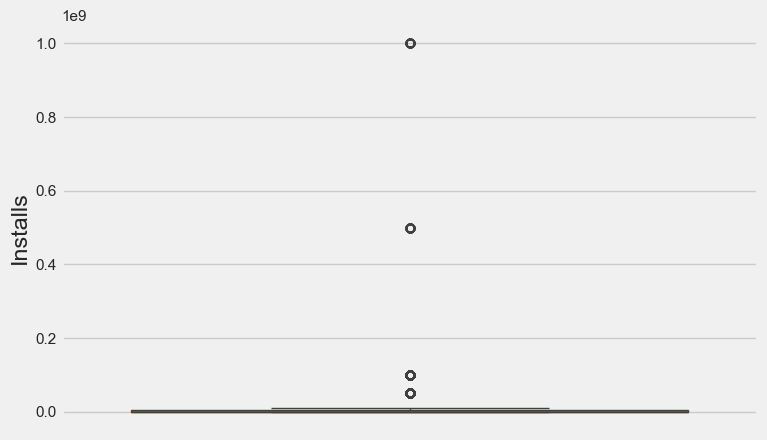

In [2209]:
sns.boxplot(data["Installs"])

<Axes: ylabel='Price($)'>

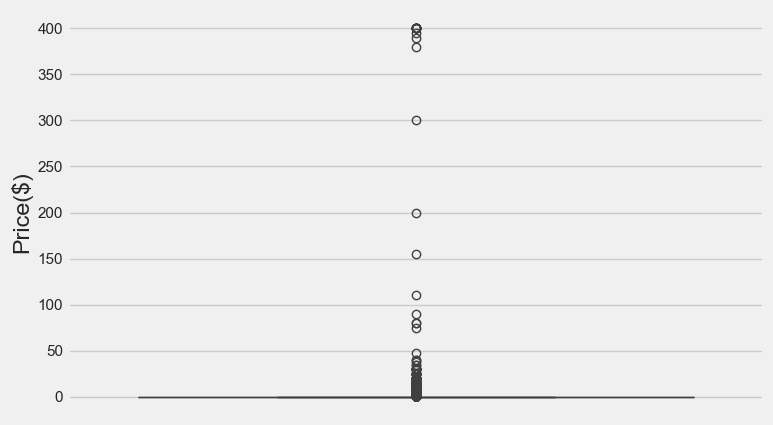

In [2210]:
sns.boxplot(data['Price($)'])

### D- Exploer The Data After Preprocessing

In [2211]:
data

,App,Category,Rating,Reviews,Size(megabytes),Installs,Type,Price($),Content Rating,Genres,Current Ver,Android Ver,Updated_Month,Updated_Year
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19.0,10000.0,Free,0.0,Everyone,Art & Design,1.0.0,4.0.3 and up,1,2018
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,500000.0,Free,0.0,Everyone,Art & Design;Pretend Play,2.0.0,4.0.3 and up,1,2018
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7,5000000.0,Free,0.0,Everyone,Art & Design,1.2.4,4.0.3 and up,8,2018
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25.0,50000000.0,Free,0.0,Teen,Art & Design,Varies with device,4.2 and up,6,2018
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8,100000.0,Free,0.0,Everyone,Art & Design;Creativity,1.1,4.4 and up,6,2018
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53.0,5000.0,Free,0.0,Everyone,Education,1.48,4.1 and up,7,2017
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6,100.0,Free,0.0,Everyone,Education,1.0,4.1 and up,7,2018
10838,Parkinson Exercices FR,MEDICAL,4.3,3,9.5,1000.0,Free,0.0,Everyone,Medical,1.0,2.2 and up,1,2017
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,13.0,1000.0,Free,0.0,Mature 17+,Books & Reference,Varies with device,Varies with device,1,2015


In [2212]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10829 entries, 0 to 10840
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   App              10829 non-null  object 
 1   Category         10829 non-null  object 
 2   Rating           10829 non-null  float64
 3   Reviews          10829 non-null  int32  
 4   Size(megabytes)  10829 non-null  float64
 5   Installs         10829 non-null  float64
 6   Type             10829 non-null  object 
 7   Price($)         10829 non-null  float64
 8   Content Rating   10829 non-null  object 
 9   Genres           10829 non-null  object 
 10  Current Ver      10829 non-null  object 
 11  Android Ver      10829 non-null  object 
 12  Updated_Month    10829 non-null  int32  
 13  Updated_Year     10829 non-null  int32  
dtypes: float64(4), int32(3), object(7)
memory usage: 1.1+ MB


In [2213]:
data.describe()

,Rating,Reviews,Size(megabytes),Installs,Price($),Updated_Month,Updated_Year
count,10829.000000,1.082900e+04,10829.000000,1.082900e+04,10829.000000,10829.000000,10829.000000
mean,4.206510,4.446018e+05,20.191377,1.547990e+07,1.028091,6.423677,2017.400222
std,0.480467,2.929213e+06,20.987636,8.507114e+07,15.957778,2.577971,1.100401
min,1.000000,0.000000e+00,0.010000,0.000000e+00,0.000000,1.000000,2010.000000
25%,4.100000,3.800000e+01,5.900000,5.000000e+03,0.000000,5.000000,2017.000000
50%,4.300000,2.100000e+03,13.000000,1.000000e+05,0.000000,7.000000,2018.000000
75%,4.500000,5.481500e+04,26.000000,5.000000e+06,0.000000,8.000000,2018.000000
max,5.000000,7.815831e+07,100.000000,1.000000e+09,400.000000,12.000000,2018.000000


# 3- Exploratory Data Analysis

#### A- Review some charts

#### B- Showig graphs comparing certain columns with 5-star rated applications."

### A- Review some charts

In [2214]:
data['Category'].value_counts()

Category
FAMILY                 1968
GAME                   1144
TOOLS                   841
MEDICAL                 463
BUSINESS                460
PRODUCTIVITY            424
PERSONALIZATION         390
COMMUNICATION           387
SPORTS                  384
LIFESTYLE               382
FINANCE                 366
HEALTH_AND_FITNESS      341
PHOTOGRAPHY             335
SOCIAL                  295
NEWS_AND_MAGAZINES      283
SHOPPING                260
TRAVEL_AND_LOCAL        258
DATING                  234
BOOKS_AND_REFERENCE     230
VIDEO_PLAYERS           175
EDUCATION               156
ENTERTAINMENT           149
MAPS_AND_NAVIGATION     137
FOOD_AND_DRINK          127
HOUSE_AND_HOME           88
AUTO_AND_VEHICLES        85
LIBRARIES_AND_DEMO       84
WEATHER                  82
EVENTS                   64
ART_AND_DESIGN           64
PARENTING                60
COMICS                   60
BEAUTY                   53
Name: count, dtype: int64

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32],
 [Text(0, 0, 'ART_AND_DESIGN'),
  Text(1, 0, 'AUTO_AND_VEHICLES'),
  Text(2, 0, 'BEAUTY'),
  Text(3, 0, 'BOOKS_AND_REFERENCE'),
  Text(4, 0, 'BUSINESS'),
  Text(5, 0, 'COMICS'),
  Text(6, 0, 'COMMUNICATION'),
  Text(7, 0, 'DATING'),
  Text(8, 0, 'EDUCATION'),
  Text(9, 0, 'ENTERTAINMENT'),
  Text(10, 0, 'EVENTS'),
  Text(11, 0, 'FINANCE'),
  Text(12, 0, 'FOOD_AND_DRINK'),
  Text(13, 0, 'HEALTH_AND_FITNESS'),
  Text(14, 0, 'HOUSE_AND_HOME'),
  Text(15, 0, 'LIBRARIES_AND_DEMO'),
  Text(16, 0, 'LIFESTYLE'),
  Text(17, 0, 'GAME'),
  Text(18, 0, 'FAMILY'),
  Text(19, 0, 'MEDICAL'),
  Text(20, 0, 'SOCIAL'),
  Text(21, 0, 'SHOPPING'),
  Text(22, 0, 'PHOTOGRAPHY'),
  Text(23, 0, 'SPORTS'),
  Text(24, 0, 'TRAVEL_AND_LOCAL'),
  Text(25, 0, 'TOOLS'),
  Text(26, 0, 'PERSONALIZATION'),
  Text(27, 0, 'PRODUCTIVITY

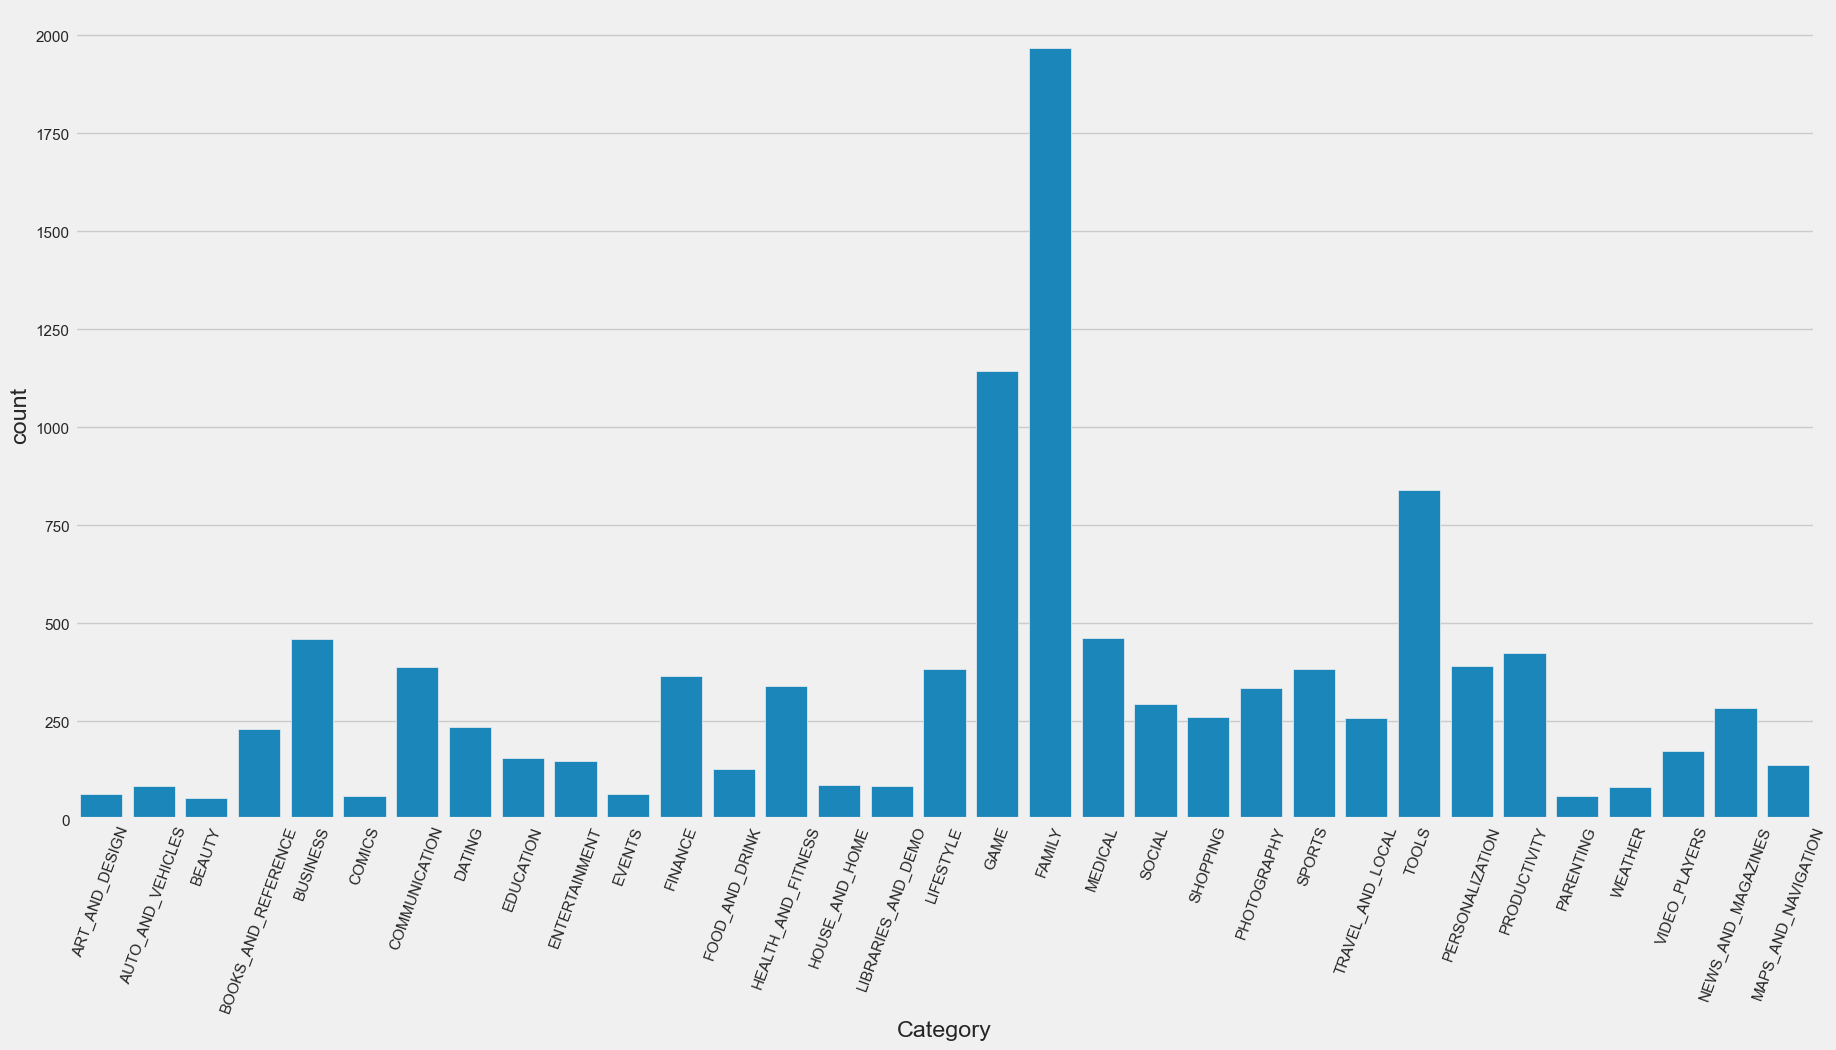

In [2215]:
pltf.rcParams['figure.figsize'] = (20, 10)
sns.countplot(x='Category',data=data)
pltf.xticks(rotation=70)

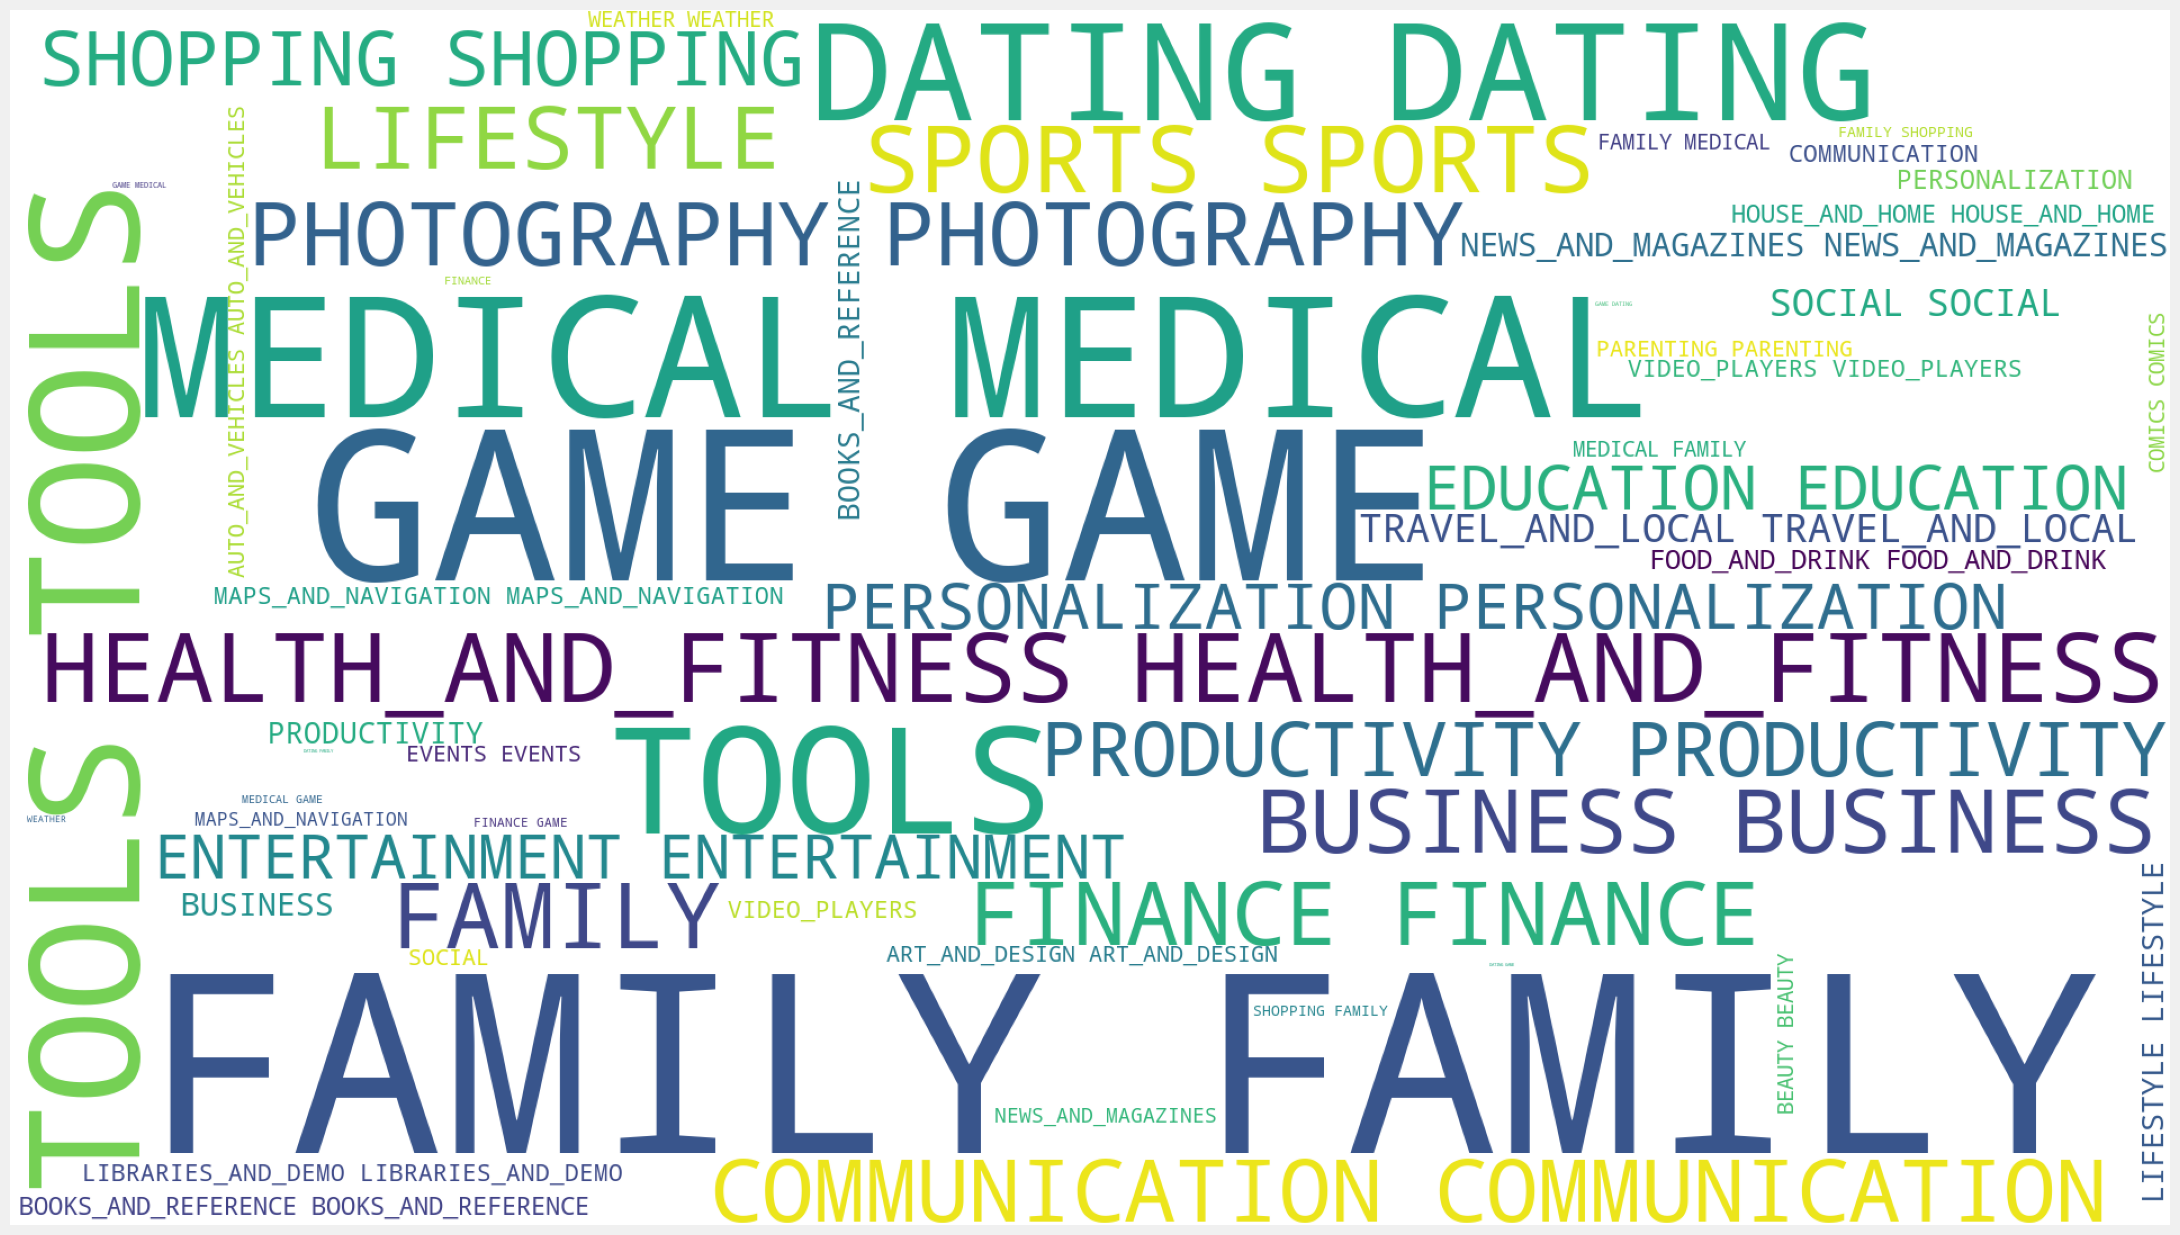

In [2216]:
pltf.subplots(figsize=(25,15))
wordcloud = WordCloud(
                          background_color='white',
                          width=1920,
                          height=1080
                         ).generate(" ".join(data.Category))
pltf.imshow(wordcloud)
pltf.axis('off')
pltf.show()

#### Category vs Rating Analysis

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32],
 [Text(0, 0, 'MEDICAL'),
  Text(1, 0, 'FAMILY'),
  Text(2, 0, 'FINANCE'),
  Text(3, 0, 'LIFESTYLE'),
  Text(4, 0, 'PERSONALIZATION'),
  Text(5, 0, 'SPORTS'),
  Text(6, 0, 'COMICS'),
  Text(7, 0, 'TOOLS'),
  Text(8, 0, 'NEWS_AND_MAGAZINES'),
  Text(9, 0, 'BUSINESS'),
  Text(10, 0, 'BOOKS_AND_REFERENCE'),
  Text(11, 0, 'SOCIAL'),
  Text(12, 0, 'SHOPPING'),
  Text(13, 0, 'EVENTS'),
  Text(14, 0, 'HEALTH_AND_FITNESS'),
  Text(15, 0, 'GAME'),
  Text(16, 0, 'PRODUCTIVITY'),
  Text(17, 0, 'LIBRARIES_AND_DEMO'),
  Text(18, 0, 'PHOTOGRAPHY'),
  Text(19, 0, 'PARENTING'),
  Text(20, 0, 'COMMUNICATION'),
  Text(21, 0, 'TRAVEL_AND_LOCAL'),
  Text(22, 0, 'DATING'),
  Text(23, 0, 'FOOD_AND_DRINK'),
  Text(24, 0, 'ART_AND_DESIGN'),
  Text(25, 0, 'AUTO_AND_VEHICLES'),
  Text(26, 0, 'MAPS_AND_NAVIGATION'),
  Text(27, 

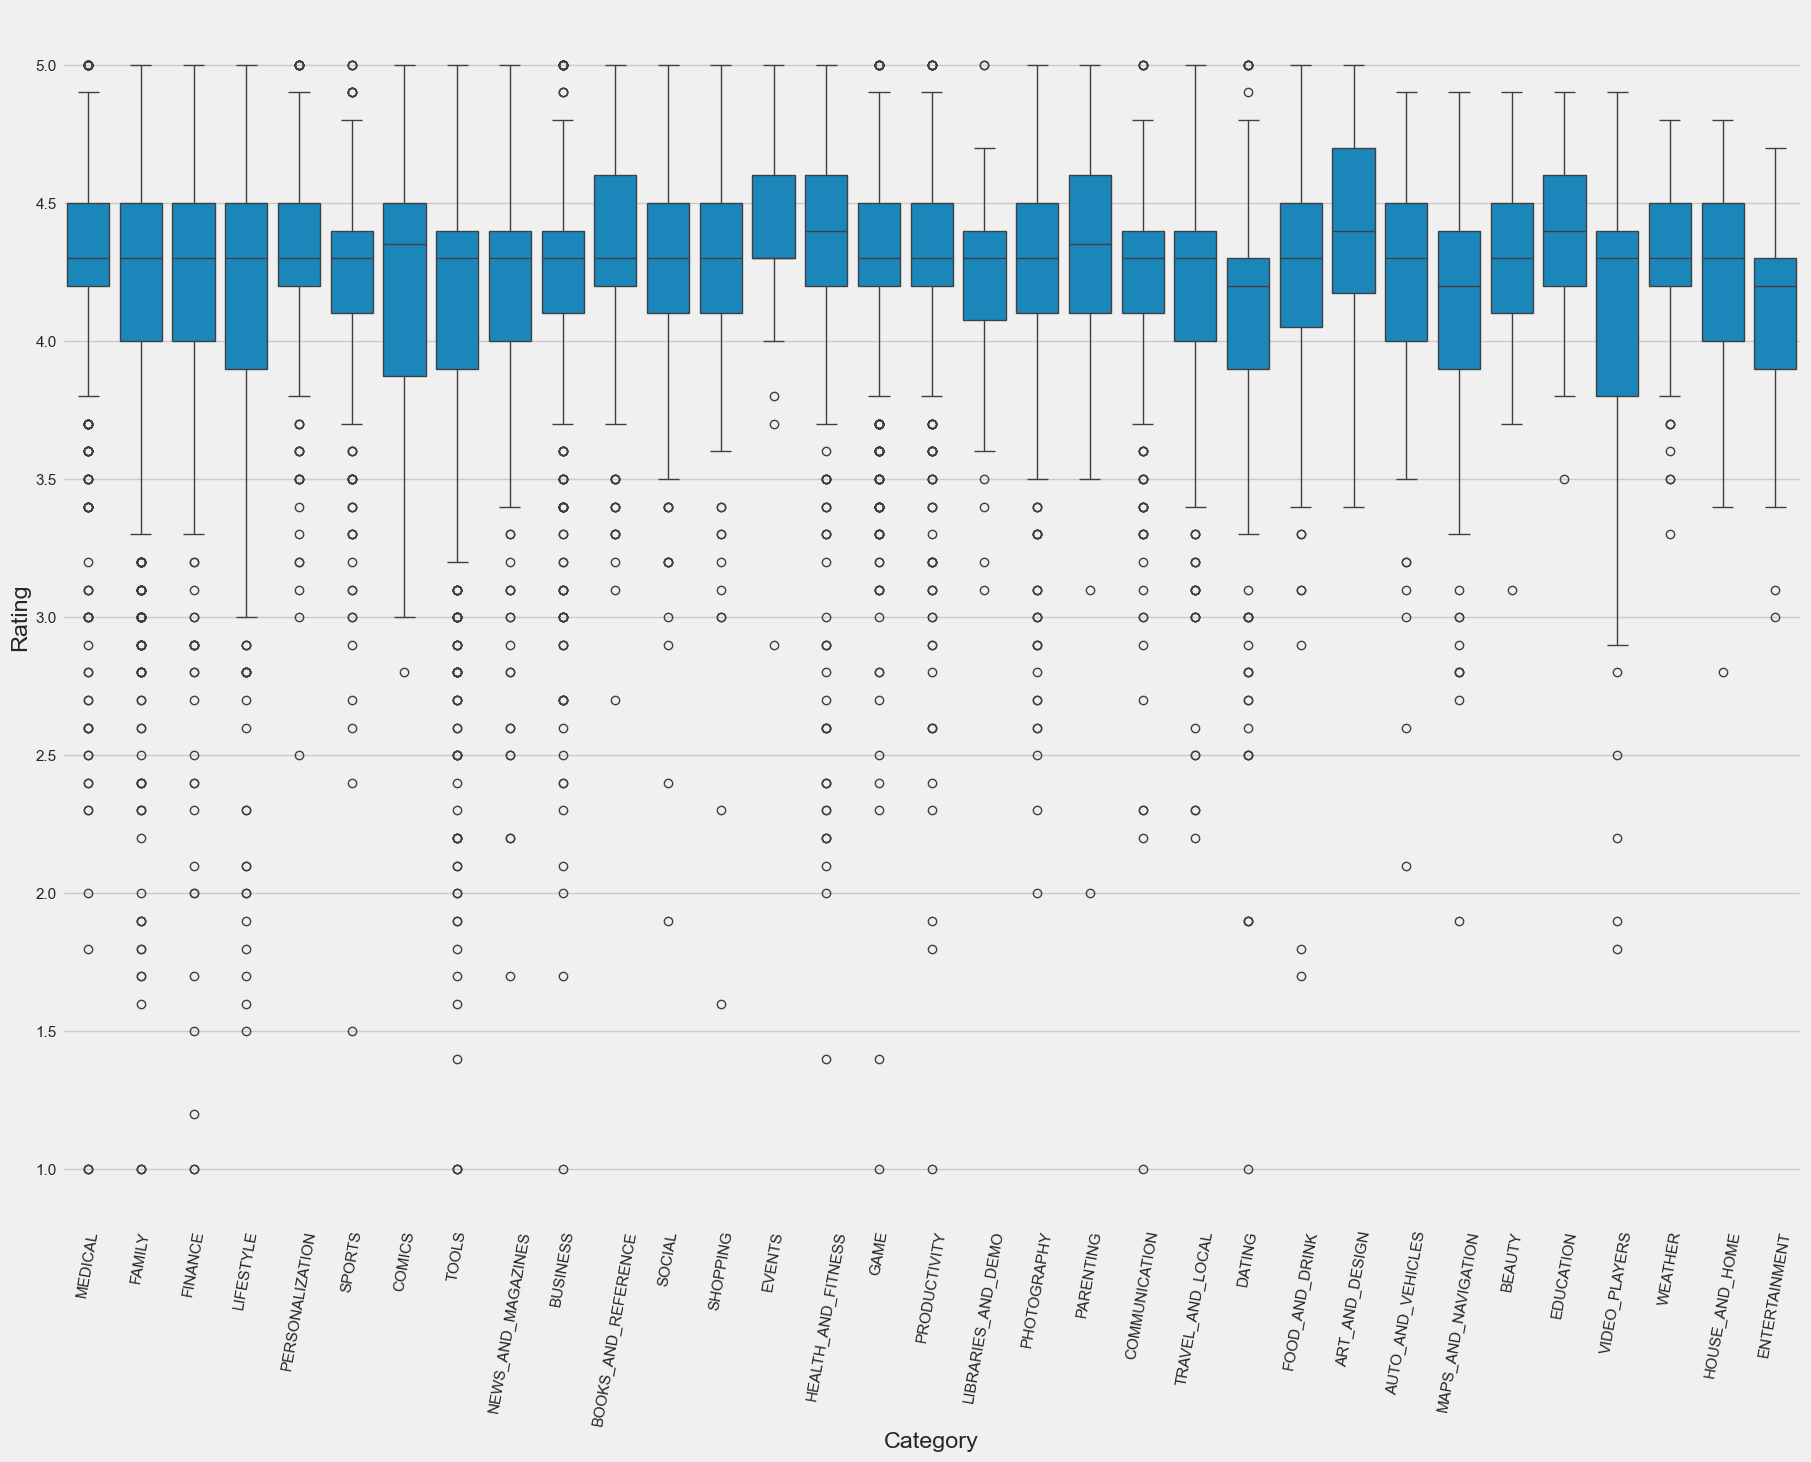

In [2217]:
pltf.figure(figsize=(20,15))
sns.boxplot(y='Rating',x='Category',data = data.sort_values('Rating',ascending=False))
pltf.xticks(rotation=80)

#### Type Column

In [2218]:
data['Type'].value_counts()

Type
Free    10032
Paid      797
Name: count, dtype: int64

([0, 1], [Text(0, 0, 'Free'), Text(1, 0, 'Paid')])

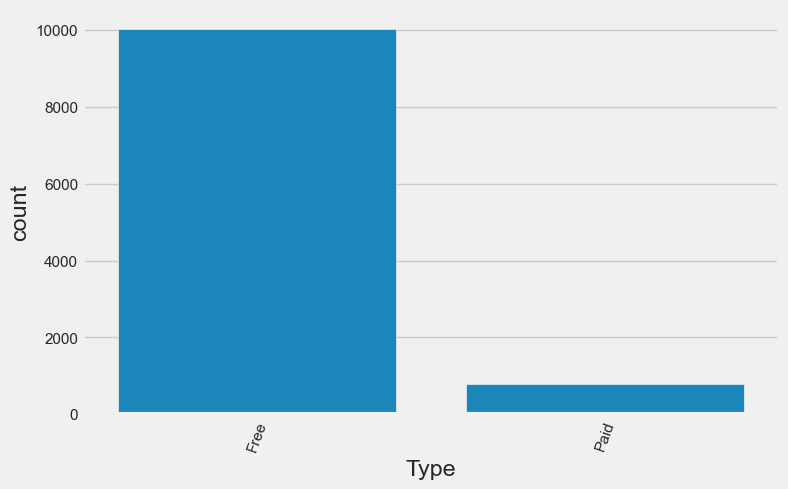

In [2219]:
pltf.rcParams['figure.figsize'] = (8,5)
sns.countplot(x='Type',data=data)
pltf.xticks(rotation=70)

<Axes: ylabel='count'>

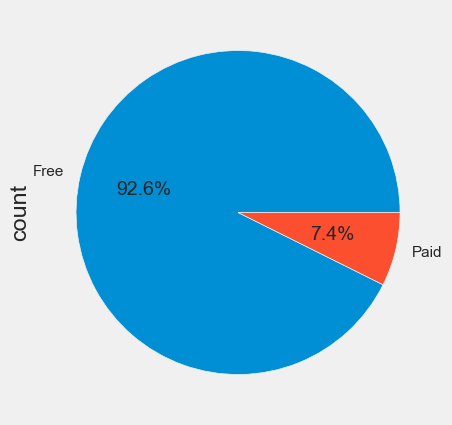

In [2220]:
data["Type"].value_counts().plot.pie(autopct = "%1.1f%%")

#### Type vs Rating Analysis

<Figure size 1500x800 with 0 Axes>

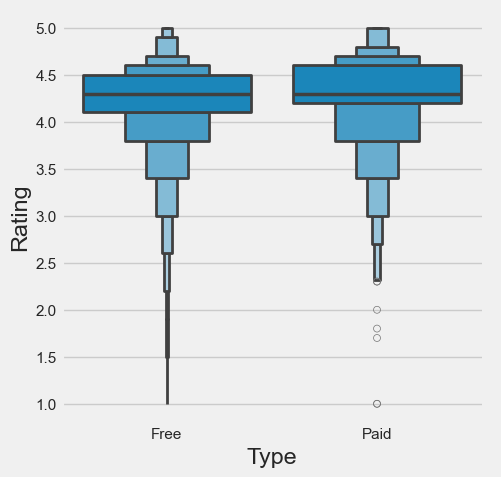

In [2221]:
pltf.figure(figsize=(15,8))
sns.catplot(y='Rating',x='Type',data = data.sort_values('Rating',ascending=False),kind='boxen')

#### Content Rating vs Rating Analysis

([0, 1, 2, 3, 4, 5],
 [Text(0, 0, 'Everyone'),
  Text(1, 0, 'Everyone 10+'),
  Text(2, 0, 'Mature 17+'),
  Text(3, 0, 'Teen'),
  Text(4, 0, 'Adults only 18+'),
  Text(5, 0, 'Unrated')])

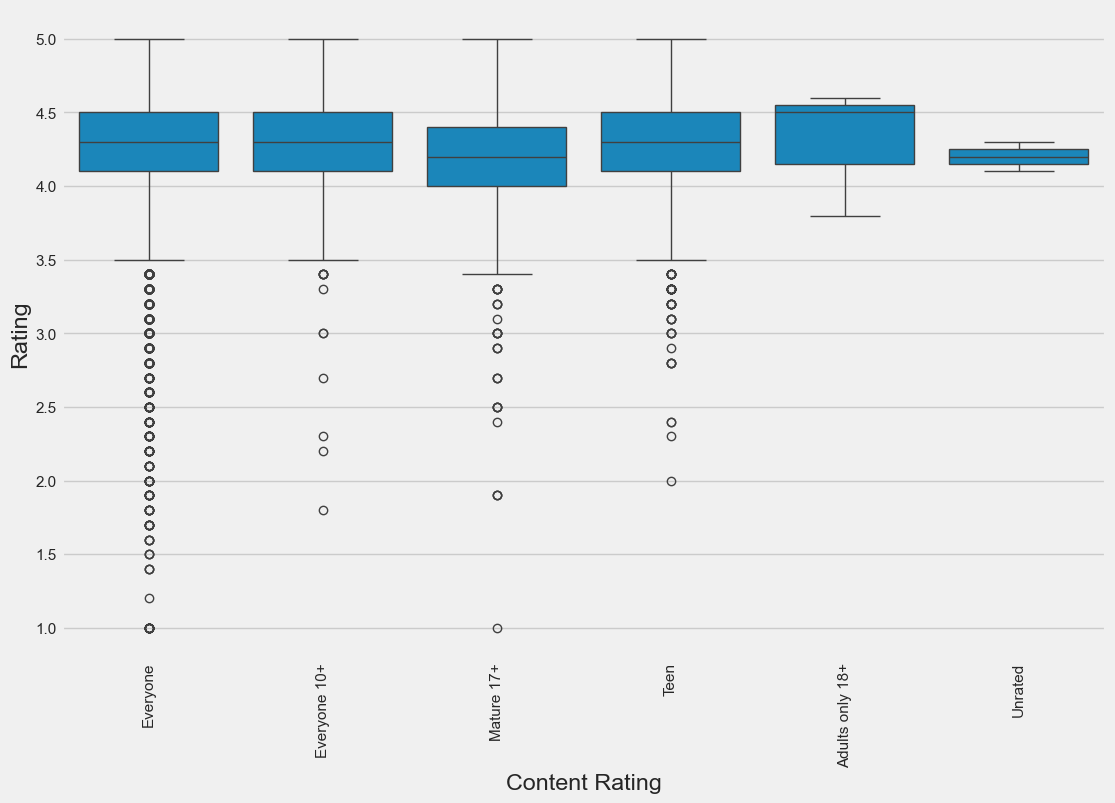

In [2222]:
pltf.figure(figsize=(12,8))
sns.boxplot(y='Rating',x='Content Rating',data = data.sort_values('Rating',ascending=False))
pltf.xticks(rotation=90)

<Axes: xlabel='Content Rating', ylabel='Installs'>

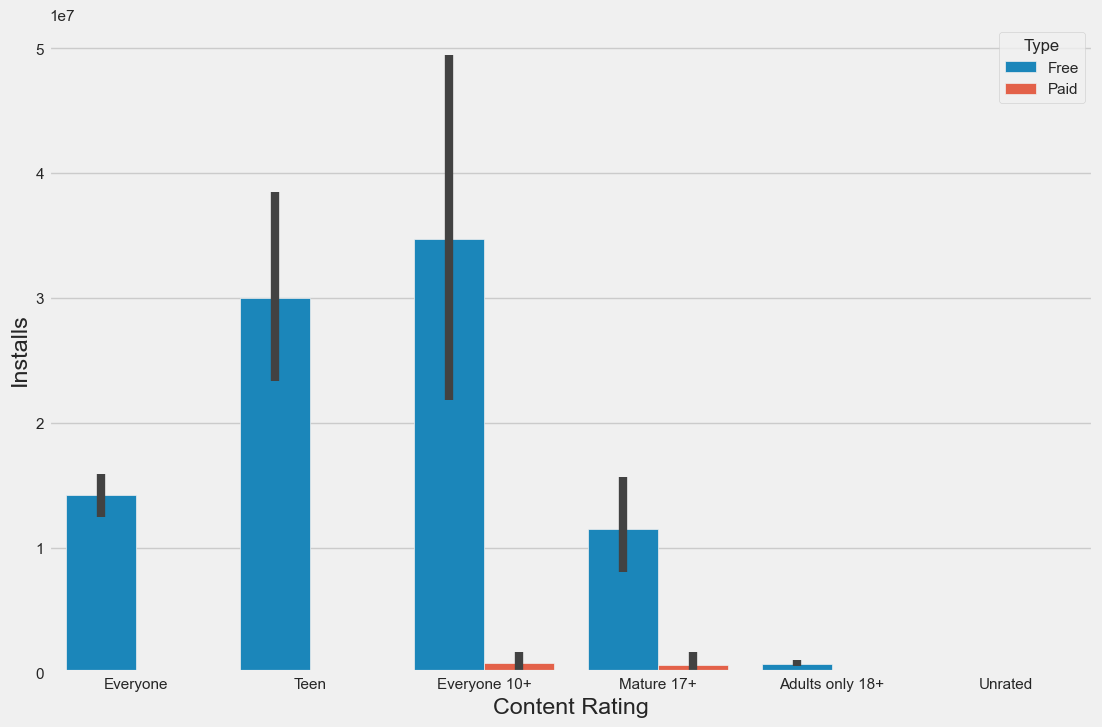

In [2223]:
pltf.figure(figsize=(12,8))
sns.barplot(x="Content Rating", y="Installs", hue="Type", data=data)

#### Genres Column

In [2224]:
data['Genres'].value_counts()

Genres
Tools                                840
Entertainment                        622
Education                            548
Medical                              463
Business                             460
                                    ... 
Parenting;Brain Games                  1
Travel & Local;Action & Adventure      1
Lifestyle;Pretend Play                 1
Tools;Education                        1
Strategy;Creativity                    1
Name: count, Length: 119, dtype: int64

#### Current Ver Column

In [2225]:
data['Current Ver'].value_counts()

Current Ver
Varies with device    1458
1.0                    809
1.1                    263
1.2                    178
2.0                    151
                      ... 
5.44.1                   1
7.16.8                   1
04.08.00                 1
2.10.06                  1
2.0.148.0                1
Name: count, Length: 2831, dtype: int64

#### Android Ver Column

In [2226]:
data['Android Ver'].value_counts()

Android Ver
4.1 and up            2451
4.0.3 and up          1501
4.0 and up            1373
Varies with device    1361
4.4 and up             980
2.3 and up             651
5.0 and up             601
4.2 and up             393
2.3.3 and up           281
2.2 and up             244
4.3 and up             243
3.0 and up             240
2.1 and up             134
1.6 and up             115
6.0 and up              60
7.0 and up              42
3.2 and up              36
2.0 and up              31
5.1 and up              24
1.5 and up              19
4.4W and up             12
3.1 and up              10
2.0.1 and up             7
8.0 and up               6
7.1 and up               3
4.0.3 - 7.1.1            2
5.0 - 8.0                2
1.0 and up               2
7.0 - 7.1.1              1
4.1 - 7.1.1              1
5.0 - 6.0                1
2.2 - 7.1.1              1
5.0 - 7.1.1              1
Name: count, dtype: int64

#### kde-Plot Analysis

In [2227]:
# Function to create a scatter plot
def scatters(col1, col2):
    # Create a scatter plot using Seaborn
    pltf.figure(figsize=(10, 6))  # Adjust the figure size as needed
    sns.scatterplot(data=data, x=col1, y=col2, hue='Type')
    pltf.title(f'Scatter Plot of {col1} vs {col2}')
    pltf.xlabel(col1)
    pltf.ylabel(col2)
    pltf.show()

# Function to create a KDE plot
def kde_plot(feature):
    # Create a FacetGrid for KDE plots using Seaborn
    grid = sns.FacetGrid(data, hue='Type', aspect=2)

    # Map KDE plots for the specified feature
    grid.map(sns.kdeplot, feature)

    # Add a legend to distinguish between categories
    grid.add_legend()

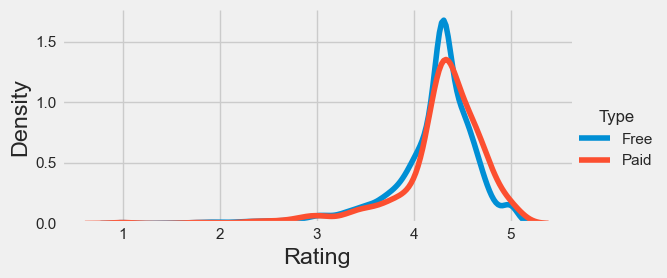

In [2228]:
kde_plot('Rating')

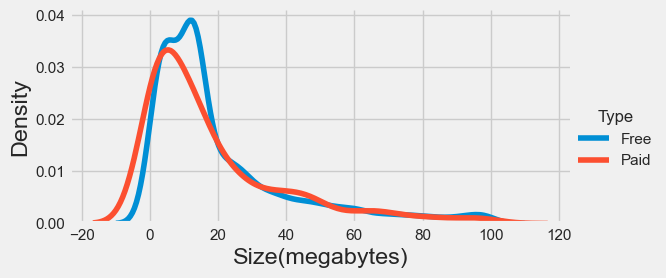

In [2229]:
kde_plot('Size(megabytes)')

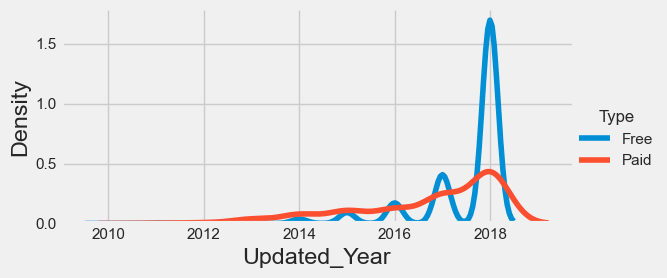

In [2230]:
kde_plot('Updated_Year')

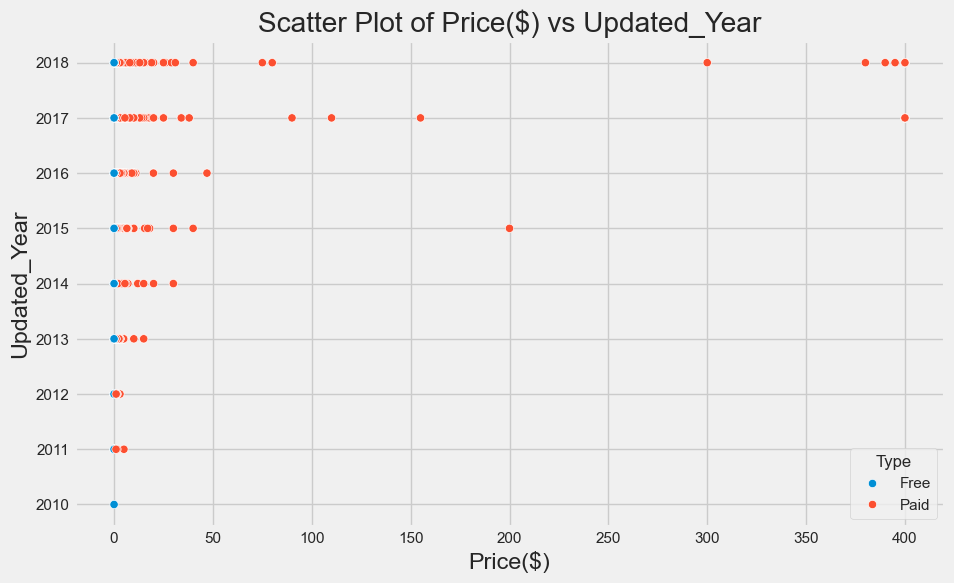

In [2231]:
scatters('Price($)', 'Updated_Year')

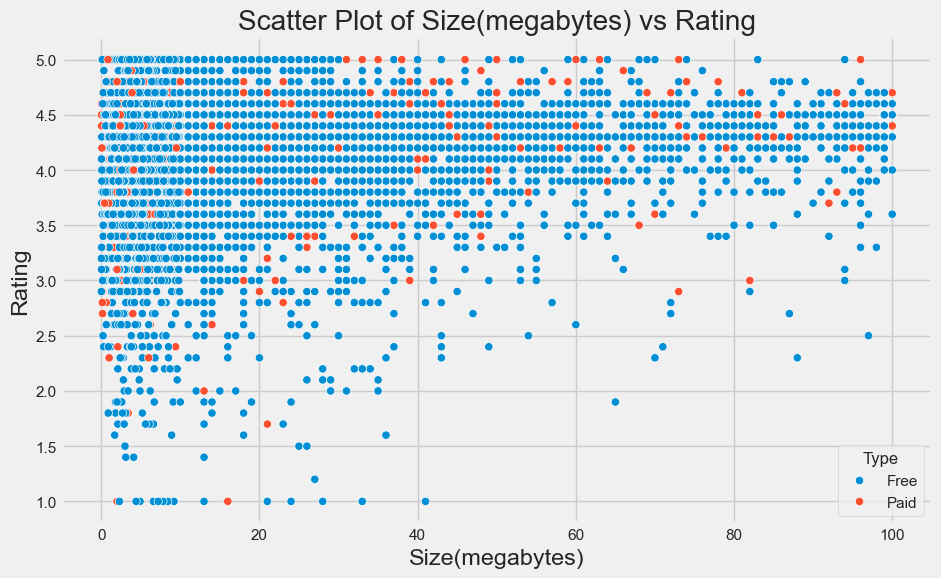

In [2232]:
scatters('Size(megabytes)', 'Rating')

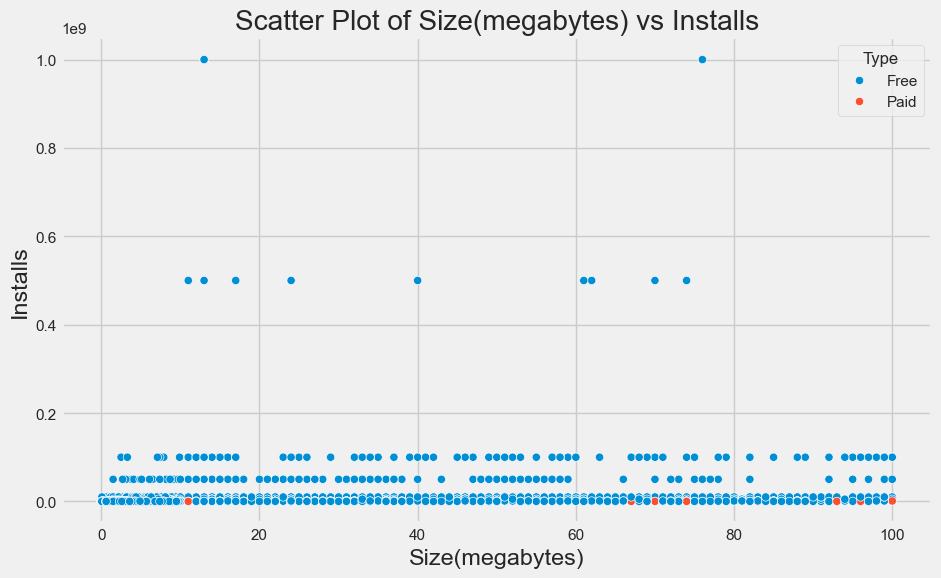

In [2233]:
scatters('Size(megabytes)', 'Installs')

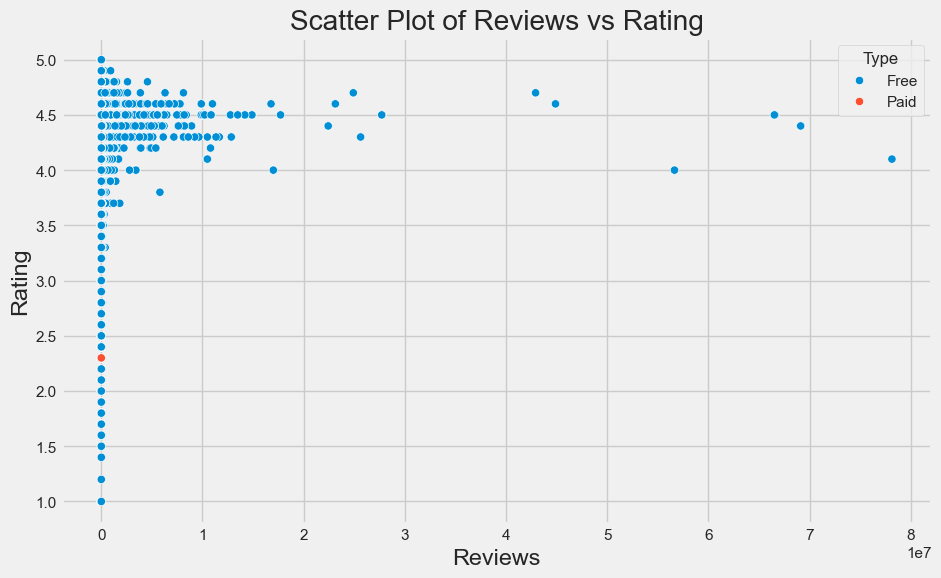

In [2234]:
scatters('Reviews', 'Rating')

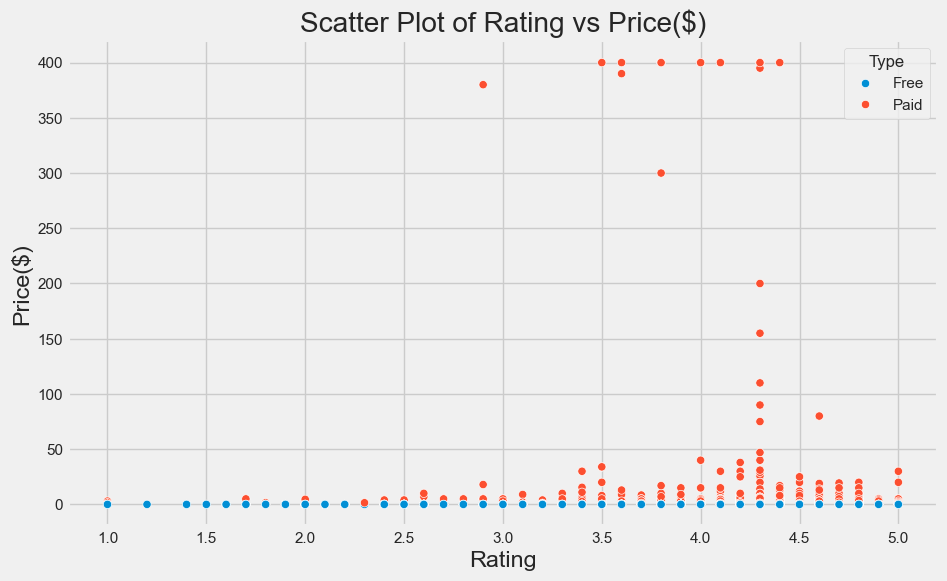

In [2235]:
scatters('Rating', 'Price($)')

### B- Showing graphs comparing certain columns with Apps Rated 4 or higher.

In [2236]:
df_rating_4_up = data[data.Rating >= 4.]
print(f'There are {df_rating_4_up.shape[0]} apps having rating of 4.0 or higher')

There are 8832 apps having rating of 4.0 or higher


#### Installs

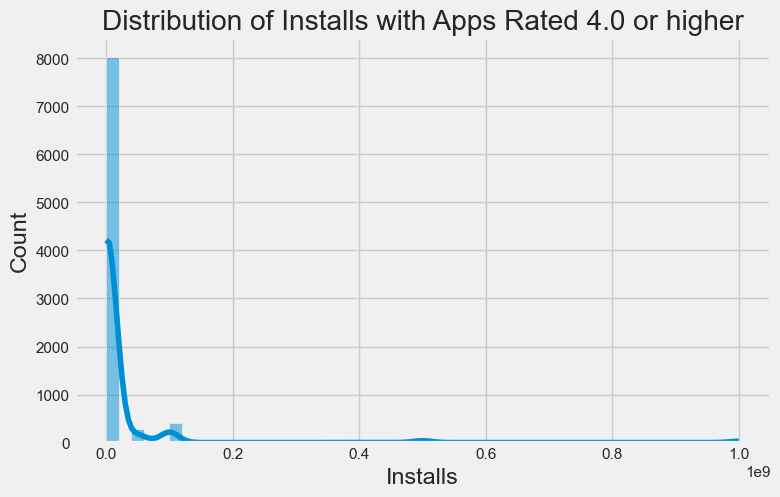

In [2237]:
sns.histplot(data=df_rating_4_up, x='Installs', kde=True, bins=50)

pltf.title('Distribution of Installs with Apps Rated 4.0 or higher')
pltf.show()

##### Despite the full ratings, the number of installations for the majority of the apps is low. Hence, those apps cannot be considered the best products.

#### Reviews

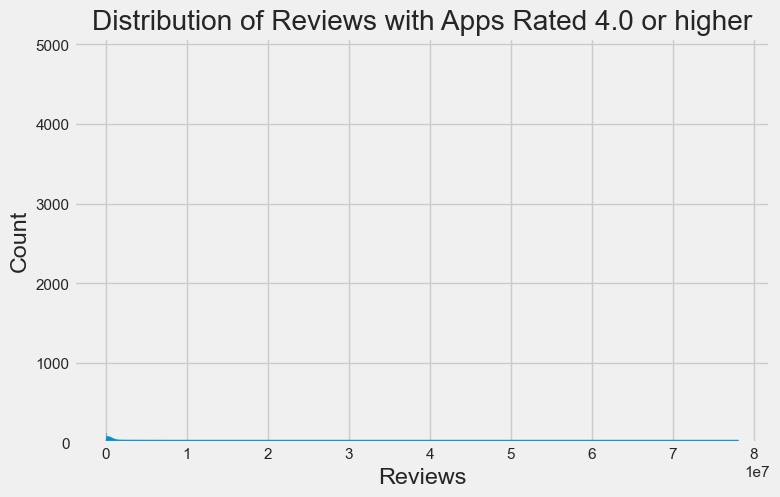

In [2238]:
sns.histplot(data=df_rating_4_up, x='Reviews', kde=True)
pltf.title('Distribution of Reviews with Apps Rated 4.0 or higher')
pltf.show()

##### The distribution is right-skewed which shows applications with few reviews having 5.0 ratings, which is misleading.

#### Category

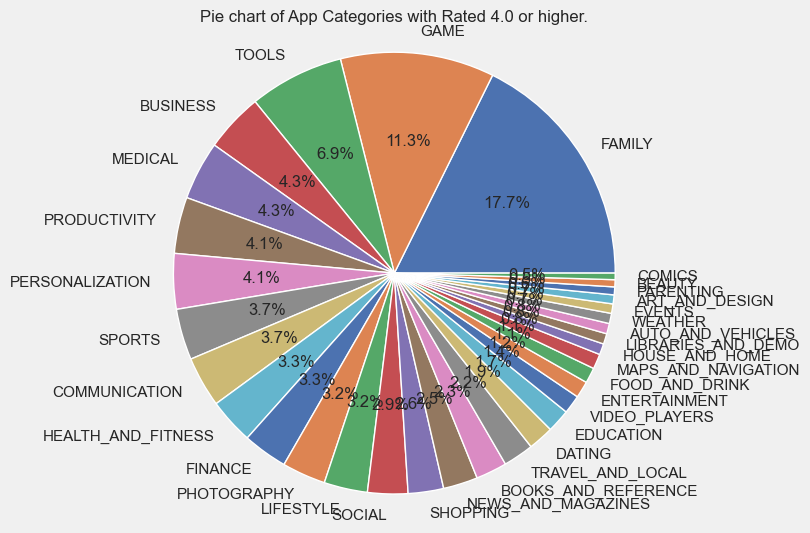

In [2239]:
df_rating_4_up_Category =  df_rating_4_up['Category'].value_counts().reset_index()

# Create a pie chart
pltf.figure(figsize=(8, 6))
sns.set(style="whitegrid")
pltf.pie(df_rating_4_up_Category.iloc[:, 1], labels=df_rating_4_up_Category.iloc[:, 0], autopct='%1.1f%%')
pltf.title('Pie chart of App Categories with Rated 4.0 or higher.')
pltf.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

# Show the pie chart
pltf.show()

##### Family, LifeStyle and Medical apps receive the most 4 or higher ratings on Google Play Store with Family.

#### Type

In [2240]:
df_rating_4_up_type =  df_rating_4_up['Type'].value_counts().reset_index()

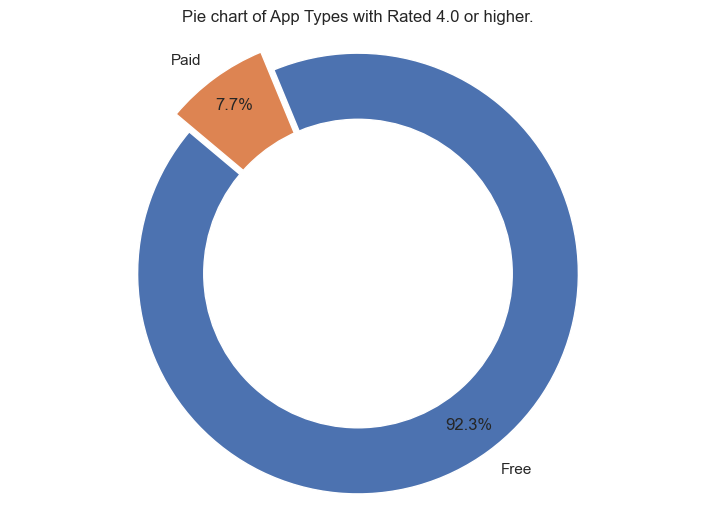

In [2241]:
# Create a pie chart
pltf.figure(figsize=(8, 6))
sns.set(style="whitegrid")

# Data for the pie chart
sizes = df_rating_4_up_type.iloc[:, 1]
labels = df_rating_4_up_type.iloc[:, 0]

# Pull a slice out by exploding it
explode = (0, 0.1)  # Adjust the second value to control the pull-out distance

# Create the pie chart with default colors
pltf.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140, pctdistance=0.85, explode=explode)

# Draw a circle in the center to make it look like a donut chart
centre_circle = pltf.Circle((0,0),0.70,fc='white')
fig = pltf.gcf()
fig.gca().add_artist(centre_circle)

# Equal aspect ratio ensures that pie is drawn as a circle.
pltf.axis('equal')

# Title
pltf.title('Pie chart of App Types with Rated 4.0 or higher.')

# Show the pie chart
pltf.show()

##### Almost 90% of the 4.0 rating or higher apps are free on Google Play Store.

Text(0.5, 1.0, 'Time series plot of Last Updates')

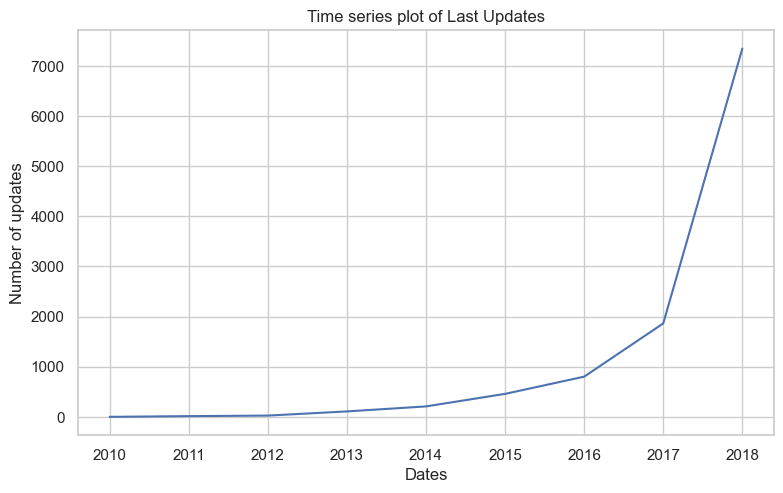

In [2243]:
freq= pd.Series()
freq=data['Updated_Year'].value_counts()
freq.plot()
pltf.xlabel("Dates")
pltf.ylabel("Number of updates")
pltf.title("Time series plot of Last Updates")

# 4- Data Splitting for Modeling

#### A- Splitting the dataset into train and test.

#### B- Label Encoding

### A- Splitting the dataset into train and test.

##### We split the dataset into 80% train and 20% test.

In [2244]:
target = 'Rating'

In [2245]:
pruned_features = ['App', 'Genres', 'Current Ver', 'Android Ver'] # Non-targeted columns
X = data.copy().drop(pruned_features+[target], axis=1) # table containing non-target columns
y = data.copy()[target] # A table containing a targeted results column

In [2252]:
X

,Category,Reviews,Size(megabytes),Installs,Type,Price($),Content Rating,Updated_Month,Updated_Year
0,ART_AND_DESIGN,159,19.0,10000.0,Free,0.0,Everyone,1,2018
1,ART_AND_DESIGN,967,14.0,500000.0,Free,0.0,Everyone,1,2018
2,ART_AND_DESIGN,87510,8.7,5000000.0,Free,0.0,Everyone,8,2018
3,ART_AND_DESIGN,215644,25.0,50000000.0,Free,0.0,Teen,6,2018
4,ART_AND_DESIGN,967,2.8,100000.0,Free,0.0,Everyone,6,2018
...,...,...,...,...,...,...,...,...,...
10836,FAMILY,38,53.0,5000.0,Free,0.0,Everyone,7,2017
10837,FAMILY,4,3.6,100.0,Free,0.0,Everyone,7,2018
10838,MEDICAL,3,9.5,1000.0,Free,0.0,Everyone,1,2017
10839,BOOKS_AND_REFERENCE,114,13.0,1000.0,Free,0.0,Mature 17+,1,2015


###### To express the success or failure of the project, any project that achieves a rating of 4 or above is considered successful
###### Therefore, we will convert the Rating column to Binary

In [2246]:
def rating_to_binary(rating):
    if rating >= 3.5:
        return 1
    else:
        return 0

y = y.apply(rating_to_binary)

In [2247]:
#Separate the target results table and the non-target results table into two groups for Test set and Train set (Randomly)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=42) # Test set 20%, Train set 80%

In [2248]:
y_train

7031    1
9957    1
8174    1
4034    1
5803    0
       ..
5738    1
5195    1
5394    1
861     1
7276    1
Name: Rating, Length: 8663, dtype: int64

### B- Label Encoding

##### Convert text data in the "categories", "Content Rating", "Type" columns into numbers

In [2249]:
le_dict = defaultdict()
features_to_encode = X_train.select_dtypes(include=['category', 'object']).columns 

for col in features_to_encode:
    le = LabelEncoder()

    X_train[col] = le.fit_transform(X_train[col]) # Fitting and tranforming the Train data
    X_train[col] = X_train[col].astype('category') # Converting the label encoded features from numerical back to categorical dtype in pandas

    X_test[col] = le.transform(X_test[col]) # Only transforming the test data
    X_test[col] = X_test[col].astype('category') # Converting the label encoded features from numerical back to categorical dtype in pandas

    le_dict[col] = le # Saving the label encoder for individual features


### C- Standardization
##### Convert "Updated_Month" to Catrgorical feature because months are considered a cyclical counter, ranging from 1 to 12, they are not treated as a numerical column like other columns. Therefore, they need to be transformed.







In [2250]:
# Converting and adding "Last Updated Month" to categorical features
categorical_features = features_to_encode + ['Updated_Month']
X_train['Updated_Month'] = X_train['Updated_Month'].astype('category')
X_test['Updated_Month'] = X_test['Updated_Month'].astype('category')

# Listing numeric features to scale
numeric_features = X_train.select_dtypes(exclude=['category', 'object']).columns

In [2251]:
numeric_features

Index(['Reviews', 'Size(megabytes)', 'Installs', 'Price($)', 'Updated_Year'], dtype='object')

In [2145]:
scaler = StandardScaler()

# Fitting and transforming the Training data
X_train[numeric_features] = scaler.fit_transform(X_train[numeric_features])
# X_train = scaler.fit_transform(X_train)

# Only transforming the Test data
X_test[numeric_features] = scaler.transform(X_test[numeric_features])
# X_test = scaler.transform(X_test)

# 5 - Regression

#### A- Linear Regressor
#### B -Random Forest Regressor
#### C- Regression Algorithms Results Evaluation

#### The Evaluation of regression results will have been according to several factors using famous and important algorithms
##### 1- RMSE (Root Mean Square Error): 
###### It measures the average difference between predicted and actual values in a regression model. Equation: RMSE = sqrt(Σ(yᵢ - ŷ)² / n)
##### 2- MAE (Mean Absolute Error): 
###### t measures the average absolute difference between predicted and actual values in a regression model. Equation: MAE = Σ|yᵢ - ŷ| / n
##### 3- RMSE (Root Mean Square Error): 
###### It represents the proportion of the variance in the dependent variable that can be explained by the independent variables in a regression 
###### model. Equation: R2 = 1 - (Σ(yᵢ - ŷ)² / Σ(yᵢ - ȳ)²)

In [2146]:
models = ['Linear', 'Random Forest']
datasets = ['train', 'test']
metrics = ['RMSE', 'MAE', 'R2']

multi_index = pd.MultiIndex.from_product([models, datasets, metrics],
                                         names=['model', 'dataset', 'metric'])

df_metrics_reg = pd.DataFrame(index=multi_index,
                          columns=['value'])

In [2147]:
df_metrics_reg

value
model         dataset metric      
Linear        train   RMSE     NaN
                      MAE      NaN
                      R2       NaN
              test    RMSE     NaN
                      MAE      NaN
                      R2       NaN
Random Forest train   RMSE     NaN
                      MAE      NaN
                      R2       NaN
              test    RMSE     NaN
                      MAE      NaN
                      R2       NaN

### A- Linear Regressor

In [2148]:
lr = LinearRegression()
lr.fit(X_train, y_train)
y_train_pred = lr.predict(X_train)
y_test_pred = lr.predict(X_test)

##### Calculate the R2

In [2149]:
df_metrics_reg.loc['Linear', 'train', 'R2'] = lr.score(X_train, y_train)
df_metrics_reg.loc['Linear', 'test', 'R2'] = lr.score(X_test, y_test)

##### Calculate the MAE

In [2150]:

df_metrics_reg.loc['Linear', 'train', 'MAE'] = mean_absolute_error(y_train, y_train_pred)
df_metrics_reg.loc['Linear', 'test', 'MAE'] = mean_absolute_error(y_test, y_test_pred)

##### Calculate the RMSE

In [2151]:
df_metrics_reg.loc['Linear', 'train', 'RMSE'] = mean_squared_error(y_train, y_train_pred, squared=False)
df_metrics_reg.loc['Linear', 'test', 'RMSE'] = mean_squared_error(y_test, y_test_pred, squared=False)

### C- Random Forest Regressor

In [2152]:
rf = RandomForestRegressor(max_depth=2, random_state=0)
rf.fit(X_train, y_train)
y_train_pred = rf.predict(X_train)
y_test_pred = rf.predict(X_test)

##### Calculate the R2

In [2153]:
df_metrics_reg.loc['Random Forest', 'train', 'R2'] = rf.score(X_train, y_train)
df_metrics_reg.loc['Random Forest', 'test', 'R2'] = rf.score(X_test, y_test)

##### Calculate the MAE

In [2154]:
df_metrics_reg.loc['Random Forest', 'train', 'MAE'] = mean_absolute_error(y_train, y_train_pred)
df_metrics_reg.loc['Random Forest', 'test', 'MAE'] = mean_absolute_error(y_test, y_test_pred)

##### Calculate the RMSE

In [2155]:
df_metrics_reg.loc['Random Forest', 'train', 'RMSE'] = mean_squared_error(y_train, y_train_pred, squared=False)
df_metrics_reg.loc['Random Forest', 'test', 'RMSE'] = mean_squared_error(y_test, y_test_pred, squared=False)

### C- Regression Algorithms Results Evaluation

In [2156]:
# Rounding the values

df_metrics_reg['value'] = df_metrics_reg['value'].apply(lambda v: round(v, ndigits=3))
df_metrics_reg

value
model         dataset metric       
Linear        train   RMSE    0.248
                      MAE     0.124
                      R2      0.012
              test    RMSE    0.255
                      MAE     0.127
                      R2      0.009
Random Forest train   RMSE    0.243
                      MAE     0.119
                      R2      0.054
              test    RMSE    0.248
                      MAE     0.120
                      R2      0.060

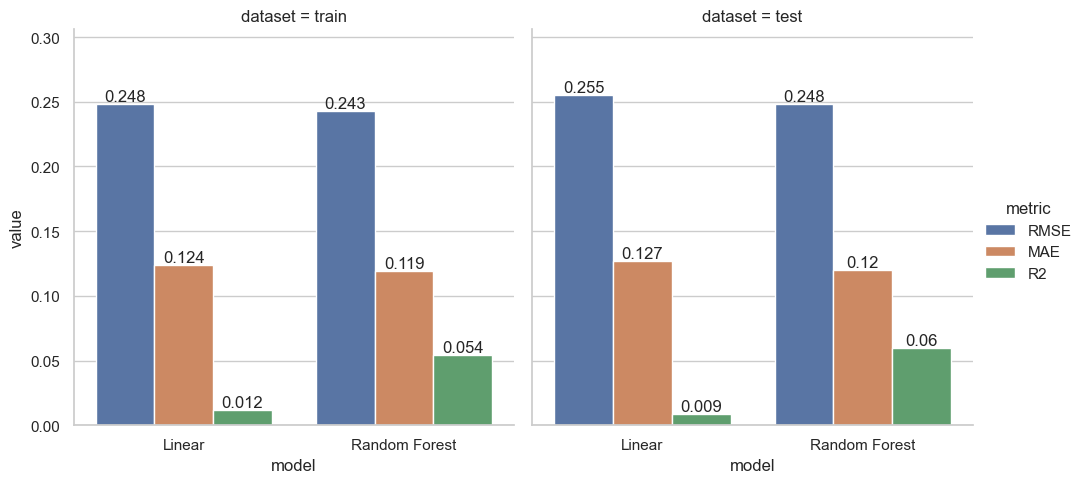

In [2157]:
data = df_metrics_reg.reset_index()

g = sns.catplot(col='dataset', data=data, kind='bar', x='model', y='value', hue='metric')

# Adding annotations to bars
# iterate through axes
for ax in g.axes.ravel():
    # add annotations
    for c in ax.containers:
        ax.bar_label(c, label_type='edge')

    ax.margins(y=0.2)

pltf.show()

##### Results indicate weak performance for both the linear regression and Random Forest models, with higher errors and lower predictive accuracy
##### We can interpret that the dataset is not suitable for regression problem.

# 6- Classification

#### A- Logistic Regression
#### B- KNN
#### C- Random Forest

##### The results of the classification models will be evaluated using accuracy

##### Accuracy:
###### The proportion of correct predictions made by a classification model out of the total number of predictions.
###### Accuracy = (Number of Correct Predictions) / (Total Number of Predictions)

In [2158]:
#classification algorithms deal with deterministic data belonging to a possible set of values, this is more beneficial for classification algorithms.
#Converting the Rating from continuous to discrete 
y_train_int = y_train.astype(int)
y_test_int = y_test.astype(int)

In [2159]:
models = ['Logistic Regression', 'KNN', 'Random Forest']
datasets = ['train', 'test']

multi_index = pd.MultiIndex.from_product([models, datasets],
                                         names=['model', 'dataset'])

df_metrics_clf = pd.DataFrame(index=multi_index,
                          columns=['Accuracy %'])

In [2160]:
df_metrics_clf

Accuracy %
model               dataset           
Logistic Regression train          NaN
                    test           NaN
KNN                 train          NaN
                    test           NaN
Random Forest       train          NaN
                    test           NaN

### A- Logistic Regression Classifier

In [2161]:
lr_clf = LogisticRegression()
lr_clf.fit(X_train, y_train_int)

LogisticRegression()

##### Calculate the Accuracy

In [2162]:
df_metrics_clf.loc[('Logistic Regression', 'train'), 'Accuracy %'] = lr_clf.score(X_train, y_train_int)
df_metrics_clf.loc[('Logistic Regression', 'test'), 'Accuracy %'] = lr_clf.score(X_test, y_test_int)

##### Calculate a TPR & FPR

In [2163]:
y_pred_lr_clf = lr_clf.decision_function(X_test)
lr_clf_fpr, lr_clf_tpr, _ = roc_curve(y_test_int, y_pred_lr_clf)
auc_lr_clf = auc(lr_clf_fpr, lr_clf_tpr)

### B- KNeighbors Classifier

In [2164]:
knn_clf = KNeighborsClassifier()
knn_clf.fit(X_train, y_train_int)

KNeighborsClassifier()

##### Calculate the Accuracy

In [2165]:
df_metrics_clf.loc[('KNN', 'train'), 'Accuracy %'] = knn_clf.score(X_train, y_train_int)
df_metrics_clf.loc[('KNN', 'test'), 'Accuracy %'] = knn_clf.score(X_test, y_test_int)

##### Calculate a TPR & FPR

In [2166]:
y_pred_knn_clf = knn_clf.predict_proba(X_test)[:, 1]
knn_clf_fpr, knn_clf_tpr, _ = roc_curve(y_test_int, y_pred_knn_clf)
auc_knn_clf = auc(knn_clf_fpr, knn_clf_tpr)

### C- Random Forest Classifier

In [2167]:
rf_clf = RandomForestClassifier()
rf_clf.fit(X_train, y_train_int)

RandomForestClassifier()

##### Calculate the Accuracy

In [2168]:
df_metrics_clf.loc[('Random Forest', 'train'), 'Accuracy %'] = rf_clf.score(X_train, y_train_int)
df_metrics_clf.loc[('Random Forest', 'test'), 'Accuracy %'] = rf_clf.score(X_test, y_test_int)

##### Calculate a TPR & FPR

In [2169]:
y_pred_rf_clf = rf_clf.predict_proba(X_test)[:, 1]
rf_clf_fpr, rf_clf_tpr, _ = roc_curve(y_test_int, y_pred_rf_clf)
auc_rf_clf = auc(rf_clf_fpr, rf_clf_tpr)

### C- Classification  Algorithms Results Evaluation

In [2170]:
# Rounding and coverting the accuracies to percentages
df_metrics_clf['Accuracy %'] = df_metrics_clf['Accuracy %'].apply(lambda v: round(v*100, ndigits=2))
df_metrics_clf

Accuracy %
model               dataset            
Logistic Regression train         93.32
                    test          92.94
KNN                 train         93.47
                    test          92.24
Random Forest       train         99.98
                    test          93.12

#### Accuracy results 

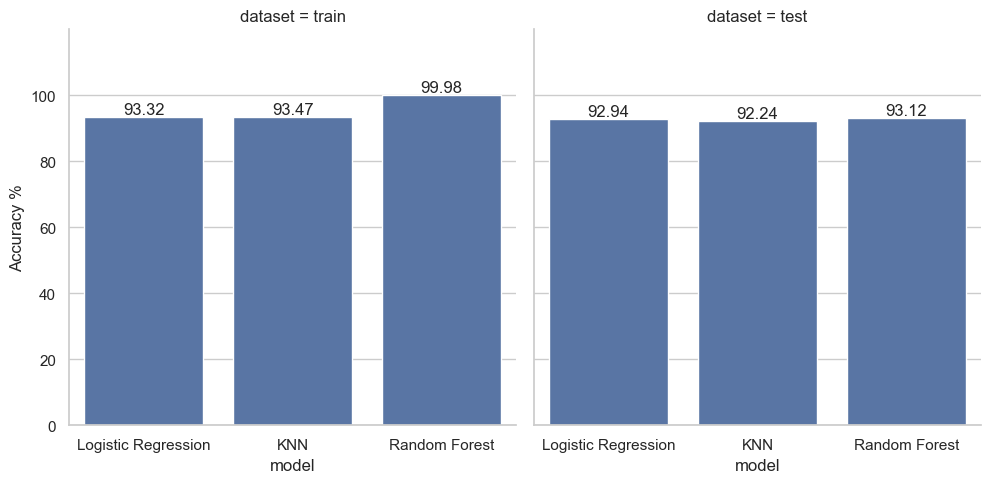

In [2171]:
data = df_metrics_clf.reset_index()

g = sns.catplot(col='dataset', data=data, kind='bar', x='model', y='Accuracy %')

# Adding annotations to bars
# iterate through axes
for ax in g.axes.ravel():
    # add annotations
    for c in ax.containers:
        ax.bar_label(c, label_type='edge')

    ax.margins(y=0.2)

pltf.show()

### ROC & AUC results

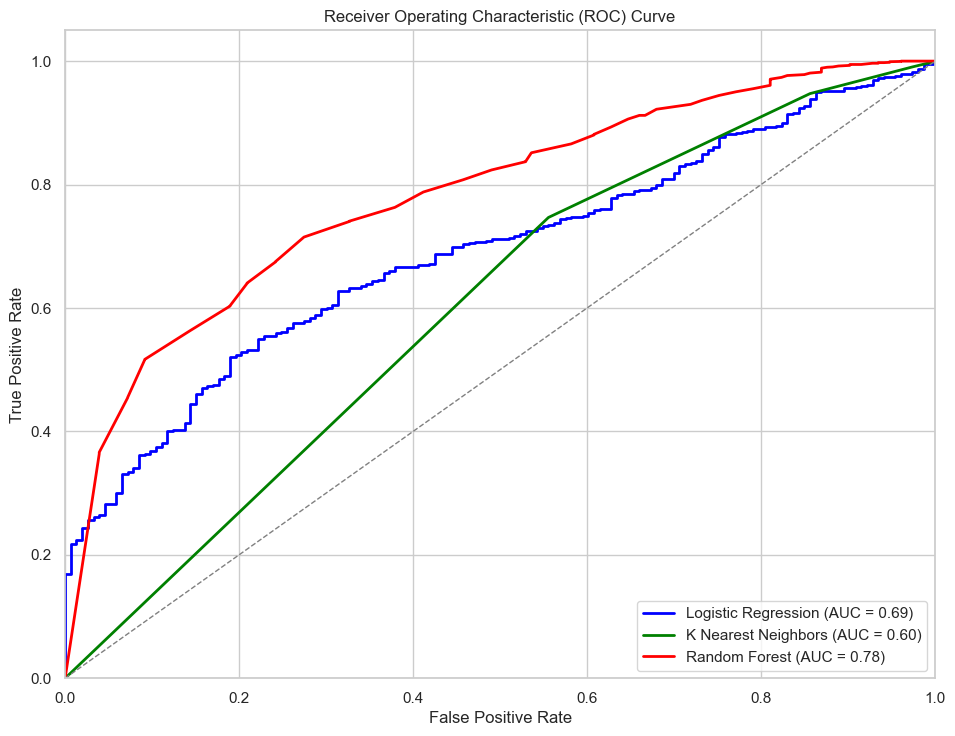

In [2172]:
pltf.figure(figsize=(10, 8))
pltf.plot(lr_clf_fpr, lr_clf_tpr, color='blue', lw=2, label='Logistic Regression (AUC = %0.2f)' % auc_lr_clf)
pltf.plot(knn_clf_fpr, knn_clf_tpr, color='green', lw=2, label='K Nearest Neighbors (AUC = %0.2f)' % auc_knn_clf)
pltf.plot(rf_clf_fpr, rf_clf_tpr, color='red', lw=2, label='Random Forest (AUC = %0.2f)' % auc_rf_clf)
pltf.plot([0, 1], [0, 1], color='gray', lw=1, linestyle='--')
pltf.xlim([0.0, 1.0])
pltf.ylim([0.0, 1.05])
pltf.xlabel('False Positive Rate')
pltf.ylabel('True Positive Rate')
pltf.title('Receiver Operating Characteristic (ROC) Curve')
pltf.legend(loc="lower right")
pltf.show()

##### Logistic Regression:this model is able to distinguish between classes acceptably, but there is room for improvement in performance. Further adjustments to the model or the inclusion of additional features may enhance its performance.

##### K Nearest Neighbors:this model exhibits relatively weak performance in class prediction. Exploring additional model configurations such as altering the number of neighbors or employing data enhancement techniques may prove beneficial.

##### Random Forest: this the model performs well in class prediction. However, it's important to always consider the broader context of the problem and factors such as class balance and the type of data used for evaluation.